In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo, z_at_value
import astropy.units as u

In [5]:
# load in SN Ia hostlib
hosts = pd.read_csv("/global/cfs/cdirs/lsst/groups/SN/snana/SURVEYS/LSST/ROOT/HOSTLIB/SNIa_GHOST.HOSTLIB", sep=' ', header=15)

In [86]:
# default settings for SNANA
a0 = 0.002
a1 = 0.04
def dztol(z, a0, a1, a2=0):
    dztol = a0+a1*z+a2*z**2
    return dztol

In [23]:
host_opts_z = []
zrange = np.linspace(0,1,101)
for z in zrange:
    dztol_calc = dztol(z, a0, a1)
    host_opts = hosts.loc[((z-dztol_calc)<hosts['ZTRUE'])&(hosts['ZTRUE']<(z+dztol_calc))]
    host_opts_z.append(len(host_opts))

Text(0.5, 0, '$z$ of transient')

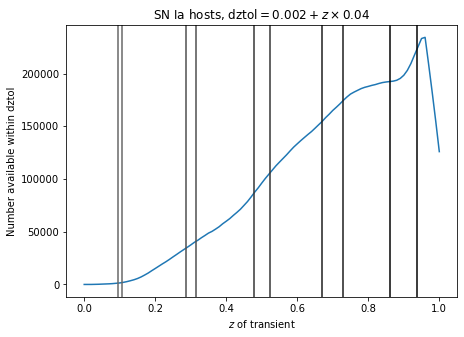

In [51]:
plt.figure(figsize=[7,5])
plt.plot(zrange,host_opts_z)
plt.title(r"SN Ia hosts, dztol$=0.002+z\times0.04$")
plt.ylabel("Number available within dztol")
plt.axvline(0.1-dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.1+dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.3-dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.3+dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.5-dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.5+dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.7-dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.7+dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.9-dztol(0.9,a0,a1), 0, 200000, color='k')
plt.axvline(0.9+dztol(0.9,a0,a1), 0, 200000, color='k')
plt.xlabel("$z$ of transient")

In [53]:
# try tighter limits
a0 = 0.0005
a1 = 0.01
host_opts_z = []
zrange = np.linspace(0,1,101)
for z in zrange:
    dztol_calc = dztol(z, a0, a1)
    host_opts = hosts.loc[((z-dztol_calc)<hosts['ZTRUE'])&(hosts['ZTRUE']<(z+dztol_calc))]
    host_opts_z.append(len(host_opts))

Text(0.5, 0, '$z$ of transient')

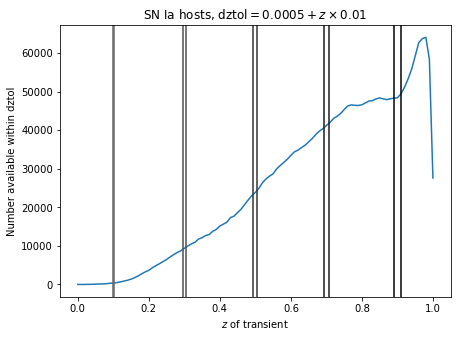

In [55]:
plt.figure(figsize=[7,5])
plt.plot(zrange,host_opts_z)
plt.title(r"SN Ia hosts, dztol$=0.0005+z\times0.01$")
plt.ylabel("Number available within dztol")
plt.axvline(0.1-dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.1+dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.3-dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.3+dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.5-dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.5+dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.7-dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.7+dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.9-dztol(0.9,a0,a1), 0, 200000, color='k')
plt.axvline(0.9+dztol(0.9,a0,a1), 0, 200000, color='k')
plt.xlabel("$z$ of transient")

In [71]:
z_at_value(cosmo.comoving_distance, 0.1*u.Mpc)

2.2594351354782855e-05

In [82]:
dist = 100*u.Mpc
dist_list  = [[dist*i, dist*i+dist] for i in range(1,35)]
zlist = []
dzlist = []
for d in dist_list:
    zmid = z_at_value(cosmo.comoving_distance, (d[0]+d[1])/2.)
    dz   = z_at_value(cosmo.comoving_distance, d[1])-z_at_value(cosmo.comoving_distance, d[0])
    zlist.append(zmid)
    dzlist.append(dz)
    
# dz = z_at_value()
# plt.plot(cosmo.comoving_distance(zrange)

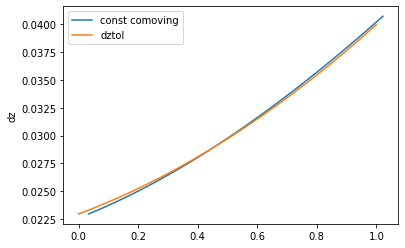

In [100]:
plt.plot(zlist, dzlist, label='const comoving')
plt.plot(zrange,dztol(zrange,dzlist[0], 0.01, 0.007), label='dztol')
plt.ylabel("dz")
plt.legend()

In [101]:
# set a0 = dzlist[0], a1 = 0.01, a2 = 0.007
a0 = dzlist[0]
a1 = 0.01
a2 = 0.007
host_opts_z = []
zrange = np.linspace(0,1,101)
for z in zrange:
    dztol_calc = dztol(z, a0, a1, a2)
    host_opts = hosts.loc[((z-dztol_calc)<hosts['ZTRUE'])&(hosts['ZTRUE']<(z+dztol_calc))]
    host_opts_z.append(len(host_opts))

Text(0.5, 0, '$z$ of transient')

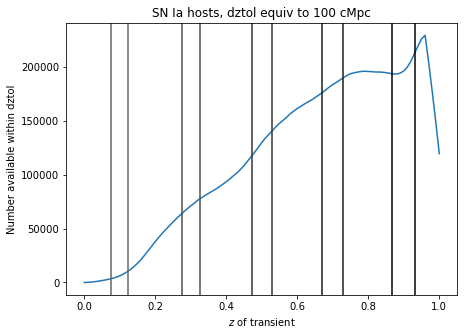

In [105]:
plt.figure(figsize=[7,5])
plt.plot(zrange,host_opts_z)
plt.title(r"SN Ia hosts, dztol equiv to 100 cMpc")
plt.ylabel("Number available within dztol")
plt.axvline(0.1-dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.1+dztol(0.1,a0,a1), 0, 200000, color='.4')
plt.axvline(0.3-dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.3+dztol(0.3,a0,a1), 0, 200000, color='.3')
plt.axvline(0.5-dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.5+dztol(0.5,a0,a1), 0, 200000, color='.2')
plt.axvline(0.7-dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.7+dztol(0.7,a0,a1), 0, 200000, color='.1')
plt.axvline(0.9-dztol(0.9,a0,a1), 0, 200000, color='k')
plt.axvline(0.9+dztol(0.9,a0,a1), 0, 200000, color='k')
plt.xlabel("$z$ of transient")

In [103]:
host_opts_z

[23,
 141,
 366,
 736,
 1215,
 1768,
 2356,
 3111,
 3860,
 4859,
 6141,
 7821,
 9693,
 11974,
 14683,
 17808,
 21296,
 25243,
 29472,
 33640,
 37949,
 41869,
 45686,
 49255,
 52712,
 56052,
 59468,
 62477,
 65510,
 68399,
 71092,
 73616,
 76413,
 78600,
 80653,
 82656,
 84670,
 86580,
 88739,
 91089,
 93523,
 96111,
 98986,
 101753,
 104885,
 108497,
 112550,
 116817,
 120888,
 125353,
 129786,
 134019,
 137502,
 140972,
 144602,
 147800,
 150510,
 153386,
 156545,
 159112,
 161495,
 163492,
 165630,
 167565,
 169403,
 171644,
 173864,
 176154,
 178722,
 181373,
 183741,
 185681,
 187917,
 190117,
 192211,
 193831,
 194606,
 195363,
 195851,
 196144,
 195843,
 195717,
 195421,
 195396,
 195199,
 194771,
 194191,
 193634,
 193533,
 194385,
 196405,
 200010,
 205436,
 212452,
 219504,
 226178,
 229424,
 204453,
 177518,
 149307,
 119635]